``````{dropdown} Code
`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre><span></span><span class="n">s</span><span class="o">=</span><span class="mi">2</span>
<span class="nb">print</span><span class="p">(</span><span class="s1">&#39;s =&#39;</span><span class="p">,</span><span class="n">s</span><span class="p">)</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````python
from scipy import signal
````
`````
``````

# Εργαστηριακή Άσκηση 1
Σκοπός της πρώτης σειράς ασκήσεων είναι, αφ’ ενός η εξοικείωση με το προγραμματιστικό περιβάλλον της Python και Matlab, αφ’ ετέρου, η εισαγωγή στους τρόπους παράστασης και επεξεργασίας τηλεπικοινωνιακών σημάτων στις συγκεκριμένες γλώσσες προγραμματισμού.

## Μέρος 1: Εξάσκηση

```{admonition} Live Code
Press the following button to make python code interactive. It will connect you to a kernel once it says "ready" (might take a bit, especially the first time it runs).
```

<div style="text-align: center;">
  <button title="Launch thebe" class="thebelab-button thebe-launch-button" onclick="initThebe()">Python Interactive Code</button>
</div>


#### Εισαγωγή packages που θα χρειαστούμε παρακάτω στη python

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell1"><span></span><span class="kn">from</span> <span class="nn">scipy</span> <span class="kn">import</span> <span class="n">signal</span>
<span class="c1"># Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal</span>
<span class="c1"># https://docs.scipy.org/doc/scipy/reference/signal.html</span>
<span class="kn">from</span> <span class="nn">scipy.fft</span> <span class="kn">import</span> <span class="n">fft</span><span class="p">,</span> <span class="n">fftfreq</span>
<span class="kn">from</span> <span class="nn">scipy.fftpack</span> <span class="kn">import</span> <span class="n">fftshift</span><span class="p">,</span> <span class="n">ifftshift</span>
<span class="kn">import</span> <span class="nn">matplotlib</span>
<span class="kn">import</span> <span class="nn">matplotlib.pyplot</span> <span class="k">as</span> <span class="nn">plt</span>
<span class="kn">import</span> <span class="nn">numpy</span> <span class="k">as</span> <span class="nn">np</span>
<span class="kn">from</span> <span class="nn">numpy</span> <span class="kn">import</span> <span class="n">random</span>
<span class="kn">import</span> <span class="nn">warnings</span>
<span class="n">warnings</span><span class="o">.</span><span class="n">filterwarnings</span><span class="p">(</span><span class="s1">'ignore'</span><span class="p">)</span>
<span class="kn">from</span> <span class="nn">ipywidgets</span> <span class="kn">import</span> <span class="n">IntRangeSlider</span><span class="p">,</span> <span class="n">widgets</span><span class="p">,</span> <span class="n">Layout</span><span class="p">,</span> <span class="n">HBox</span><span class="p">,</span> <span class="n">VBox</span>
<span class="kn">from</span> <span class="nn">IPython.display</span> <span class="kn">import</span> <span class="n">display</span><span class="p">,</span> <span class="n">clear_output</span>
<span class="nb">print</span><span class="p">(</span><span class="s2">"Libraries added successfully!"</span><span class="p">)</span>
</pre></div>
</div>
</div>
</div>
`````

In [49]:
from scipy import signal
# Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html
from scipy.fft import fft, fftfreq
from scipy.fftpack import fftshift, ifftshift
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import IntRangeSlider, widgets, Layout, HBox, VBox
from IPython.display import display, clear_output
print("Libraries added successfully!")

Libraries added successfully!


#### Δημιουργήστε ένα βαθμωτό (μονοδιάστατο) μέγεθος

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre><span></span><span class="n">s</span><span class="o">=</span><span class="mi">2</span>
<span class="nb">print</span><span class="p">(</span><span class="s1">&#39;s =&#39;</span><span class="p">,</span><span class="n">s</span><span class="p">)</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
s = 2;
disp(['s = ', num2str(s)]);
````
`````

In [50]:
s=2
print('s =',s)

s = 2


#### Δημιουργείστε ένα διάνυσμα πραγματικών τιμών:

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell4"><span></span><span class="n">v</span><span class="o">=</span><span class="n">np</span><span class="o">.</span><span class="n">array</span><span class="p">([</span><span class="mi">1</span><span class="p">,</span><span class="mi">5</span><span class="p">,</span><span class="mi">9</span><span class="p">])</span>
<span class="nb">print</span><span class="p">(</span><span class="s1">'v ='</span><span class="p">,</span><span class="n">v</span><span class="p">)</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
v = [1,5,9];
disp(['v = ', mat2str(v)]);
````
`````

In [51]:
v=np.array([1,5,9])
print('v =',v)

v = [1 5 9]


#### Δημιουργείστε έναν πίνακα πραγματικών τιμών:

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell6"><span></span><span class="n">a</span><span class="o">=</span><span class="n">np</span><span class="o">.</span><span class="n">array</span><span class="p">([[</span><span class="mi">1</span><span class="p">,</span><span class="mi">2</span><span class="p">,</span><span class="mi">3</span><span class="p">],[</span><span class="mi">4</span><span class="p">,</span><span class="mi">5</span><span class="p">,</span><span class="mi">6</span><span class="p">],[</span><span class="mi">7</span><span class="p">,</span><span class="mi">8</span><span class="p">,</span><span class="mi">9</span><span class="p">]])</span>
<span class="nb">print</span><span class="p">(</span><span class="s1">'a ='</span><span class="p">,</span><span class="n">a</span><span class="p">)</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
a = [1,2,3; 4,5,6; 7,8,9];
disp(['a = ', mat2str(a)]);
````
`````

In [52]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
print('a =',a)

a = [[1 2 3]
 [4 5 6]
 [7 8 9]]


#### Αθροίστε

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell8"><span></span><span class="n">a</span><span class="o">+</span><span class="mi">5</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
a_plus_5 = a + 5;
disp(a_plus_5);
````
`````

In [53]:
a+5

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

#### Πολλαπλασιάστε

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell10"><span></span><span class="n">b</span><span class="o">=</span><span class="n">s</span><span class="o">*</span><span class="n">v</span><span class="o">*</span><span class="mi">2</span>
<span class="nb">print</span><span class="p">(</span><span class="s1">'b='</span><span class="p">,</span><span class="n">b</span><span class="p">)</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
b = s * v * 2;
disp(['b = ', mat2str(b)]);
````
`````

In [54]:
b=s*v*2
print('b=',b)

b= [ 4 20 36]


#### Πολλαπλασιάστε στοιχείο-προς-στοιχείο (elementwise)

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell12"><span></span><span class="n">np</span><span class="o">.</span><span class="n">multiply</span><span class="p">(</span><span class="n">v</span><span class="p">,</span><span class="n">b</span><span class="p">)</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
elementwise_product = v .* b;
disp(elementwise_product);
````
`````

In [55]:
np.multiply(v,b)

array([  4, 100, 324])

#### Ελέγξτε το μήκος ενός διανύσματος

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell14"><span></span><span class="nb">len</span><span class="p">(</span><span class="n">v</span><span class="p">)</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
length_v = length(v);
disp(length_v);
````
`````

In [56]:
len(v)

3

#### Ελέγξτε το μέγεθος ενός πίνακα

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell16"><span></span><span class="n">a</span><span class="o">.</span><span class="n">shape</span>   <span class="c1"># για array: np.array(a.shape)</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
shape_a = size(a);  % This will return a 2-element vector: [rows, columns]
disp(shape_a);
````
`````

In [57]:
a.shape   # για array: np.array(a.shape)

(3, 3)

#### Προσπελάστε συγκεκριμένα στοιχεία ενός πίνακα

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell18"><span></span><span class="n">a</span><span class="p">[</span><span class="mi">0</span><span class="p">,</span><span class="mi">1</span><span class="p">]</span>   <span class="c1"># Η δεικτοδότηση αρχίζει από το 0</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
element_0_1 = a(1,2);  % MATLAB indexing starts at 1
disp(element_0_1);
````
`````

In [58]:
a[0,1] # Η δεικτοδότηση αρχίζει από το 0

2

#### Προσπελάστε συγκεκριμένα στοιχεία ενός πίνακα (συνέχεια)

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell20"><span></span><span class="n">a</span><span class="p">[</span><span class="mi">1</span><span class="p">,</span><span class="o">-</span><span class="mi">1</span><span class="p">]</span>   <span class="c1"># Αρνητικές τιμές μετρούν από το τέλος, π.χ. το -1 αναφέρεται στο τελευταίο στοιχείο</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
element_1_end = a(2,end);  % 'end' keyword is used for the last element in MATLAB
disp(element_1_end);
````
`````

In [59]:
a[1,-1] # Αρνητικές τιμές μετρούν από το τέλος, π.χ. το -1 αναφέρεται στο τελευταίο στοιχείο

6

#### Προσπελάστε συγκεκριμένο τμήμα ενός διανύσματος

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell22"><span></span><span class="n">v1</span> <span class="o">=</span> <span class="n">v</span><span class="p">[</span><span class="mi">1</span><span class="p">:</span><span class="mi">3</span><span class="p">]</span>
<span class="n">v2</span> <span class="o">=</span> <span class="n">v</span><span class="p">[</span><span class="mi">1</span><span class="p">:</span><span class="mi">2</span><span class="p">]</span>
<span class="nb">print</span><span class="p">(</span><span class="s1">'v1 ='</span><span class="p">,</span><span class="n">v1</span><span class="p">)</span>
<span class="nb">print</span><span class="p">(</span><span class="s1">'v2 ='</span><span class="p">,</span><span class="n">v2</span><span class="p">)</span>   <span class="c1"># ΠΡΟΣΟΧΗ: τα στοιχεία [2ο,3ο] δίνονται ως 1:3 και όχι ως 1:2</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
v1 = v(2:3);
v2 = v(2);
disp(['v1 = ', mat2str(v1)]);
disp(['v2 = ', mat2str(v2)]);
````
`````

In [60]:
v1 = v[1:3]
v2 = v[1:2]
print('v1 =',v1)
print('v2 =',v2)
# ΠΡΟΣΟΧΗ: τα στοιχεία [2ο,3ο] δίνονται ως 1:3 και όχι ως 1:2

v1 = [5 9]
v2 = [5]


#### Προσπελάστε συγκεκριμένα τμήματα ενός πίνακα

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell24"><span></span><span class="n">a</span><span class="p">[</span><span class="mi">0</span><span class="p">:</span><span class="mi">2</span><span class="p">,:]</span>   <span class="c1"># Ομοίως: οι γραμμές 1 & 2 δίνονται ως 0:2 και όχι ως 0:1</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
a_slice = a(1:2,:);
disp(a_slice);
````
`````

In [61]:
a[0:2,:] # Ομοίως: οι γραμμές 1 & 2 δίνονται ως 0:2 και όχι ως 0:1

array([[1, 2, 3],
       [4, 5, 6]])

#### Δημιουργήστε ένα διάνυσμα με στοιχεία από το 0 έως το 0.5 και βήμα 0.1

`````{tab} Python
<div class="cell tag_thebe-init docutils container">
<div class="cell_input docutils container">
<div class="highlight-ipython3 notranslate"><div class="highlight"><pre id="codecell26"><span></span><span class="n">t</span><span class="o">=</span><span class="n">np</span><span class="o">.</span><span class="n">arange</span><span class="p">(</span><span class="mi">0</span><span class="p">,</span><span class="mf">0.5</span><span class="p">,</span><span class="mf">0.1</span><span class="p">)</span>
<span class="nb">print</span><span class="p">(</span><span class="s1">'t='</span><span class="p">,</span><span class="n">t</span><span class="p">)</span>
</pre></div>
</div>
</div>
</div>
`````
`````{tab} Matlab
````matlab
t = 0:0.1:0.5;  % The endpoint is inclusive in MATLAB, so you might want to adjust it if you want the exact same output as NumPy
t(end) = [];  % Remove the last element to match Python's exclusive endpoint
disp(['t = ', mat2str(t)]);
````
`````

In [62]:
t=np.arange(0,0.5,0.1)
print('t=',t)

t= [0.  0.1 0.2 0.3 0.4]


## Μέρος 2:  Θεωρία
### Δειγματοληψία - Ψηφιοποίηση

Τα πρωτογενή σήματα είναι κυρίως αναλογικά (συνεχούς χρόνου). Για να τα παραστήσουμε και επεξεργαστούμε στον υπολογιστή μας (ή άλλη ψηφιακή μηχανή) θα πρέπει πρώτα να τα ψηφιοποιήσουμε. Υποθέστε ένα σήμα συνεχούς χρόνου $x(t)$ με μετασχηματισμό Fourier (Continuous Time Fourier Transform – CTFT):
  
$$
 
X(f)=\int_{-\infty}^{\infty} x(t)e^{-j2\pi ft} dt
 
$$

In [63]:
# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1 / fs  # Sampling period
L = 1000  # Number of samples
t = np.arange(0, L) * T  # Create time vector


# Output widget for the plots
graph_output0 = widgets.Output()

def update_plot(selected_frequencies_first):
    with graph_output0:
        clear_output(wait=True)  # Clear the previous plot
        # Generate the signal with the selected frequencies
        signal = np.zeros(len(t))
        for f in range(selected_frequencies_first[0], selected_frequencies_first[1] + 1):
            signal += np.sin(2 * np.pi * f * t)

        # Calculate the FFT of the original signal
        original_signal_fft = fft(signal)
        # Calculate frequencies for the FFT of the original signal
        original_freqs = fftfreq(L, T)[:L // 2]
        # Calculate magnitude of Fourier coefficients (amplitude) for the original signal
        original_magnitude = np.abs(original_signal_fft)[:L // 2]
        
        # Plotting
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
        
        # Original signal plot
        axs[0].plot(t, signal, color='#00CC96')
        axs[0].set_title('Original Signal')
        axs[0].set_xlabel('Time (s)')
        axs[0].set_ylabel('Amplitude')
        axs[0].grid(True)
        
        # Fourier Transform plot
        axs[1].plot(original_freqs, original_magnitude)
        axs[1].set_title('Fourier Transformation of Original Signal')
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('Magnitude')
        axs[1].grid(True)
        
        plt.tight_layout()
        plt.show()

# Create the slider widget
frequency_slider = widgets.IntRangeSlider(
    value=[5, 10],
    min=1,
    max=50,
    step=1,
    description='Frequency Range (Hz)',
    style={'description_width': 'initial'},
    layout=Layout(width='90%'),
    continuous_update=False
)


def response(change):
        fig = update_plot(frequency_slider.value)

# Observe changes in the slider and update the plot accordingly
frequency_slider.observe(response, names='value')

# Style the HTML element
html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Continuous Time Fourier Transform – CTFT</h2>
    """
)

# Display the slider and the outputs
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center', width='100%')
ui = widgets.VBox([html_label,
              frequency_slider,
              graph_output0], layout=vbox_layout)

out = widgets.interactive_output(update_plot, {'selected_frequencies_first': frequency_slider})

clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()


Λαμβάνοντας δείγματα του $x(t)$ με ρυθμό $f_s=1/T_s$ παράγεται σήμα διακριτού χρόνου $x(nT_s)$. Μαθηματικά το αναπαριστάνουμε ως σειρά συναρτήσεων δέλτα

$$
 
x_\delta (t)=\sum_{n=-\infty}^{\infty}x(nT_s)\delta(t-nT_s)=x(t)\sum_{n=-\infty}^{\infty}\delta(t-nT_s)
 
$$

με μετασχηματισμό Fourier

$$
 
X_\delta (f)=\sum_{n=-\infty}^{\infty}x(nT_s)e^{-j2\pi fnT_s}=X(f)*1/T_s\sum_{n=-\infty}^{\infty}\delta(f-k/T_s)=1/T_s\sum_{n=-\infty}^{\infty}X(f-k/T_s)
 
$$

που είναι περιοδική συνάρτηση.

In [64]:
# Παράμετροι δειγματοληψίας
T = 1 / fs  # Sampling period
L = 1000  # Number of samples

# Create time vector
t = np.arange(0, L) * T

def plot_sampled_signal(f_range, n_samples):
    # Generate the signal with the selected frequencies
    signal = np.zeros(len(t))
    for f in range(f_range[0], f_range[1] + 1):
        signal += np.sin(2 * np.pi * f * t)
    
   # Correct downsampling approach
    sample_rate = n_samples  # Directly using selected_samples as an integer
    downsampling_factor = int(fs / sample_rate)  # Downsampling factor

    # Select every nth sample from the original time vector to match the downsampled signal
    sample_points = t[::downsampling_factor]

    # Downsample the signal by selecting every nth sample
    downsampled_signal = signal[::downsampling_factor]

    # Recalculate L for the downsampled signal if needed
    L_downsampled = len(downsampled_signal)

    # Calculate the DFT of the downsampled signal
    sampled_signal_fft = fft(downsampled_signal)

    # Calculate frequencies for the FFT of the downsampled signal
    # Note: The new sampling period is the inverse of the new sampling rate
    sampled_freqs = fftfreq(L_downsampled, 1/sample_rate)[:L_downsampled // 2]

    # Calculate magnitude of Fourier coefficients (amplitude) for the downsampled signal
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    n = len(downsampled_signal)
    T = 1 / sample_rate  # Recalculate the sampling period with the selected sample rate

    # After calculating the magnitude of Fourier coefficients
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    # Create a new frequency vector that includes the replicated frequencies
    # First, calculate the original frequency bins for the positive frequencies
    original_sampled_freqs = fftfreq(L_downsampled, T)[:L_downsampled // 2]

    shifted_freqs_negative = original_sampled_freqs - 1/T  # Shift for -1/Ts
    shifted_freqs_positive = original_sampled_freqs + 1/T  # Shift for +1/Ts

    # Concatenate the original and shifted (replicated) frequencies and magnitudes
    # This includes the original frequencies, and the replications at -1/Ts and +1/Ts
    replicated_freqs = np.concatenate([shifted_freqs_negative, original_sampled_freqs, shifted_freqs_positive])
    replicated_magnitude = np.concatenate([sampled_magnitude, sampled_magnitude, sampled_magnitude])

    # Sort the replicated frequencies and magnitudes in ascending order for proper plotting
    sorted_indices = np.argsort(replicated_freqs)
    sorted_replicated_freqs = replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]
    
    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    axs[0].scatter(sample_points, downsampled_signal, color='#00CC96', s=12)
    axs[0].set_title('Sampled Signal')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    axs[1].plot(sorted_replicated_freqs, sorted_replicated_magnitude, color='#1F77B4')
    axs[1].set_title('Fourier Transformation of Sampled Signal')
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)  

    plt.tight_layout()
    plt.show()

# Widgets
frequency_slider = widgets.IntRangeSlider(
    value=[5, 10],
    min=1,
    max=50,
    step=1,
    description='Frequency Range (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

samples_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=1000,
    step=25,
    description='Samples:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Signal Reconstruction in Digital Signal Processing</h2>
    """
)

vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')
ui = widgets.VBox([html_label, frequency_slider, samples_slider], layout=vbox_layout)

out = widgets.interactive_output(plot_sampled_signal, {'f_range': frequency_slider, 'n_samples': samples_slider})

clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

Για βαθυπερατά σήματα $x(t)$ εύρους ζώνης W, με την υπόθεση ότι ο ρυθμός δειγματοληψίας $fs ≥
2W$, ισχύει ότι $X(f) = T_s X_\delta(f)$, $0 ≤ f ≤ W$, δηλαδή, το σήμα $X(f)$ προκύπτει μετά από διάβαση του
δειγματοληπτημένου $x_\delta(t)$ μέσω ιδανικού βαθυπερατού φίλτρου κέρδους $T_s$. Από το προηγούμενο
σχήμα γίνεται φανερό ότι εάν η δειγματοληψία γίνει με συχνότητα μικρότερη του διπλασίου της
ανώτερης συχνότητας $W$ του σήματος (υποδειγμάτιση – undersampling), τότε εμφανίζονται στην
περιοχή συχνοτήτων του σήματος «είδωλα» φάσματος από ανώτερες συχνότητες που δεν
επιτρέπουν την ακριβή αποκατάσταση του αρχικού σήματος συνεχούς χρόνου. Το φαινόμενο αυτό
ονομάζεται __αναδίπλωση__ ή __επικάλυψη__ (aliasing), το δε σφάλμα κατά την αποκατάσταση του
αρχικού σήματος αποκαλείται σφάλμα αναδίπλωσης (aliasing error).
Η δειγματοληψία στο πεδίο του χρόνου αποτελεί τη βάση για τον ορισμό του μετασχηματισμού
Fourier διακριτού χρόνου (Discrete Time Fourier Transform – DTFT). Για μια σειρά διακριτών
αριθμών $x[n]$, ο μετασχηματισμός Fourier διακριτού χρόνου ορίζεται ως:

$$ 
 
X_d(\phi) \triangleq \sum_{n=-\infty}^{\infty} x[n] \exp (-j 2 \pi n \phi)
 
$$

O DTFT είναι περιοδική συνάρτηση με περίοδο $1$, επομένως, αρκεί ο υπολογισμός του στο
διάστημα συχνοτήτων $[0,1]$ ή ισοδύναμα $[-½,½]$. Να σημειωθεί ότι ο DTFT, παρότι προκύπτει από
μια σειρά διακριτών αριθμών $x[n]$, είναι συνεχής συνάρτηση της μεταβλητής $\phi$ όπως παραστατικά
φαίνεται στο επόμενο σχήμα.

In [65]:
# Παράμετροι δειγματοληψίας
T = 1 / fs  # Sampling period
L = 1000  # Number of samples

# Create time vector
t = np.arange(0, L) * T

def plot_sampled_signal(selected_frequencies, selected_samples):
    # Generate the signal with the selected frequencies
    signal = np.zeros(len(t))
    for f in range(selected_frequencies[0], selected_frequencies[1] + 1):
        signal += np.sin(2 * np.pi * f * t)
    
   # Correct downsampling approach
    sample_rate = selected_samples  # Directly using selected_samples as an integer
    downsampling_factor = int(fs / sample_rate)  # Downsampling factor

    # Downsample the signal by selecting every nth sample
    downsampled_signal = signal[::downsampling_factor]

    # Recalculate L for the downsampled signal if needed
    L_downsampled = len(downsampled_signal)

    # Calculate the DFT of the downsampled signal
    sampled_signal_fft = fft(downsampled_signal)

    # Calculate magnitude of Fourier coefficients (amplitude) for the downsampled signal
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    n = len(downsampled_signal)
    T = 1 / sample_rate  # Recalculate the sampling period with the selected sample rate

    # After calculating the magnitude of Fourier coefficients
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    # Create a new frequency vector that includes the replicated frequencies
    # First, calculate the original frequency bins for the positive frequencies
    original_sampled_freqs = fftfreq(L_downsampled, T)[:L_downsampled // 2]

    shifted_freqs_negative = original_sampled_freqs - 1/T  # Shift for -1/Ts
    shifted_freqs_positive = original_sampled_freqs + 1/T  # Shift for +1/Ts

    # Concatenate the original and shifted (replicated) frequencies and magnitudes
    # This includes the original frequencies, and the replications at -1/Ts and +1/Ts
    replicated_freqs = np.concatenate([shifted_freqs_negative, original_sampled_freqs, shifted_freqs_positive])
    replicated_magnitude = np.concatenate([sampled_magnitude, sampled_magnitude, sampled_magnitude])

    # Sort the replicated frequencies and magnitudes in ascending order for proper plotting
    sorted_indices = np.argsort(replicated_freqs)
    sorted_replicated_freqs = replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Generate an array of sample indices for the downsampled signal
    sample_indices = np.arange(len(downsampled_signal))

    # Normalize the frequency values
    normalized_freqs = original_sampled_freqs / (1/T)

    # Since you previously concatenated and sorted for replication, ensure to apply normalization there as well
    normalized_replicated_freqs = np.concatenate([
        (shifted_freqs_negative / (1/T)),  # Normalize -1/Ts shifted frequencies
        normalized_freqs,  # Already normalized original frequencies
        (shifted_freqs_positive / (1/T))   # Normalize +1/Ts shifted frequencies
    ])

    # Sort the normalized and replicated frequencies for proper plotting
    sorted_indices = np.argsort(normalized_replicated_freqs)
    sorted_normalized_replicated_freqs = normalized_replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Create the plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot the downsampled signal
    axs[0].scatter(sample_indices, downsampled_signal, color='#00CC96', s=12)
    axs[0].set_title('Sampled Signal')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)

    # Plot the Fourier Transform of the downsampled signal
    axs[1].plot(sorted_normalized_replicated_freqs, sorted_replicated_magnitude, color='#1F77B4')
    axs[1].set_title('Normalized Fourier Transformation of Sampled Signal')
    axs[1].set_xlabel('Normalized Frequency (f/fs)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# IPyWidgets sliders
frequency_slider = widgets.IntRangeSlider(
    value=[5, 10],
    min=1,
    max=50,
    step=1,
    description='Frequency range (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

samples_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=1000,
    step=25,
    description='Samples:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Discrete Time Fourier Transform – DTFT</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')
ui = widgets.VBox([html_label, frequency_slider, samples_slider], layout=vbox_layout)

# Interaction between widgets and function
out = widgets.interactive_output(
    plot_sampled_signal, 
    {'selected_frequencies': frequency_slider, 'selected_samples': samples_slider}
)

clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

Με τη σειρά των διακριτών αριθμών να προκύπτει ως αποτέλεσμα δειγματοληψίας, $x[n]=x(nT_s)$, ο
DTFT και ο μετασχηματισμός Fourier $X_\delta(f)$ του δειγματοληπτημένου σήματος συνδέονται μέσω
της αντιστοιχίας $\phi ↔ f/f_s$. Η συνήθης πρακτική είναι να παριστάνουμε τον λόγο $f/f_s$ ως
κανονικοποιημένη συχνότητα $\phi$ ($f_D$, στις σημειώσεις σας) και οι πραγματικές συχνότητες να
προκύπτουν ως πολλαπλάσιά της (συνήθως κλασματικά). Για τη σύνδεση του DTFT με τον μετασχηματισμό Fourier $X(f)$ του σήματος πρέπει επιπλέον να γίνει αναγωγή στην περίοδο δειγματοληψίας με πολλαπλασιασμό επί $T_s$ (ή διαίρεση με $f_s$).
Κατ΄ αναλογία με τη δειγματοληψία σημάτων στο χρόνο μπορούμε να κάνουμε δειγματοληψία στο
πεδίο της συχνότητας λαμβάνοντας διακριτές τιμές $X(kf_o)$ του μετασχηματισμού Fourier που
αντιστοιχούν σε ανάλυση συχνότητας $f_o=1/T_o$. Αυτό ισοδυναμεί με περιοδική επανάληψη του
σήματος συνεχούς χρόνου $x(t)$ κάθε $Τ_ο$, αφού το περιοδικό σήμα

$$
 
x_p(t)=\sum_{n=-\infty}^{\infty} x\left(t-n T_{o}\right)
 
$$

έχει μετασχηματισμό Fourier

$$
 
X(f) \sum_{n=-\infty}^{\infty} \exp \left(-j 2 \pi f n T_{o}\right)=X(f) \frac{1}{T_{o}} \sum_{k=-\infty}^{\infty} \delta\left(f-k / T_{o}\right)=\frac{1}{T_{o}} \sum_{k=-\infty}^{\infty} X\left(k / T_{o}\right) \delta\left(f-k / T_{o}\right)
 
$$

Επομένως, $X[k] = X(kf_o)/Τ_o$ είναι οι συντελεστές του αναπτύγματος σε σειρά Fourier.του περιοδικού
σήματος $x_p(t)$. Προφανώς, για σήματα $x(t)$ πεπερασμένης διάρκειας, όπου $x(t)=0$ για $|t| ≥ T$, με την
υπόθεση ότι η περίοδος $T_o ≥ 2T$, ισχύει ότι $x(t) = x_p(t)$ για $|t| ≤ T$.
Στην πράξη, τα σήματα έχουν πολύ μεγάλη διάρκεια για να μπορέσουμε να τα αναλύσουμε στην
ολότητά τους. Έτσι εφαρμόζουμε ένα ορθογωνικό χρονικό παράθυρο, ώστε να διατηρήσουμε μόνο
το πιο σημαντικό τους μέρος για το διάστημα παρατήρησης και $x(t)= 0$, αλλού. Κατά τον
υπολογισμό του DTFT $X_d(\phi)$ ενός τέτοιου ακρωτηριασμένου σήματος, αντί του απείρου
αθροίσματος, περιοριζόμαστε σε μια πεπερασμένου μήκους $L$ σειρά αριθμών $x[n]$, οπότε

$$ 
 
X_d(\phi)=\sum_{n=0}^{L-1} x[n] \exp (-j 2 \pi n \phi)
 
$$

H δειγματοληψία του $X_d(\phi)$ στο πεδίο συχνότητας σε $Ν$ ισαπέχουσες κανονικοποιημένες συχνότητες $0$, $1/Ν$, $2/Ν$, $…$, $(Ν-1)/Ν$, δίνει

$$ 
 
X[k]=X_{d}\left(\frac{k}{N}\right)=\sum_{n=0}^{N-1} x[n] \exp \left(-j 2 \pi n \frac{k}{N}\right), \quad 0 \leq k \leq N-1
 
$$

όπου, εάν $N≥L$, θέτουμε $x[n]=0$ για $n≥L$. Η τελευταία σχέση αναγνωρίζεται ως ο διακριτός μετασχηματισμός Fourier (Discrete Fourier Transform – DFT), ο οποίος για μια πεπερασμένη σειρά $xn$, $n=0$, $1$, $…$, $N-1$, ορίζεται ως:

$$ 
 
X_{k} \triangleq \sum_{n=0}^{N-1} x_{n} \exp \left(-j 2 \pi n \frac{k}{N}\right), \quad 0 \leq k \leq N-1
 
$$

και ο αντίστροφός του είναι

$$ 
 
x_{n}=\frac{1}{N} \sum_{k=0}^{N-1} X_{k} \exp \left(j 2 \pi n \frac{k}{N}\right), \quad 0 \leq n \leq N-1
 
$$

Η $X_d(\phi)$ ως DTFT είναι περιοδική συνάρτηση και εάν η αρχική σειρά xn ήταν περιοδική (και δεν
εφαρμόζαμε το παράθυρο), τότε η $X_d(\phi)$ θα ήταν μηδέν παντού εκτός των σημείων της
δειγματοληψίας $k/Ν$. Δηλαδή, εάν θεωρήσουμε μια πεπερασμένου μήκους σειρά αριθμών που
επαναλαμβάνεται περιοδικά, o διακριτού χρόνου μετασχηματισμός Fourier της (DTFT) είναι και
αυτός περιοδικός και διακριτός. Επιπλέον, ο DFT και ο αντίστροφός του IDFT, εάν δεν
περιορίζαμε τους δείκτες $n$ και $k$ μεταξύ $0$ και $N-1$, θα ήταν περιοδικές συναρτήσεις. Άρα η
πεπερασμένη σειρά xn μπορεί να θεωρηθεί ως ένα περιοδικό σήμα διακριτού χρόνου ιδωμένο μόνο
κατά τη διάρκεια μιας περιόδου και ο DFT, η σειρά $X_k$, ως τα δείγματα με ανάλυση $1/Ν$ του DTFT
$X_d(\phi)$ στο πεδίο κανονικοποιημένων συχνοτήτων $[0,1]$, όπως φαίνεται στο επόμενο σχήμα.

In [66]:
# Παράμετροι δειγματοληψίας
T = 1 / fs  # Sampling period
L = 1000  # Number of samples

# Create time vector
t = np.arange(0, L) * T

def plot_signals(f_range, samples, selected_N):
    # Generate the signal with the selected frequencies
    signal = np.zeros(len(t))
    for f in range(f_range[0], f_range[1] + 1):
        signal += np.sin(2 * np.pi * f * t)
    
   # Correct downsampling approach
    sample_rate = samples  # Directly using samples as an integer
    downsampling_factor = int(fs / sample_rate)  # Downsampling factor

    # Downsample the signal by selecting every nth sample
    downsampled_signal = signal[::downsampling_factor]

    # Recalculate L for the downsampled signal if needed
    L_downsampled = len(downsampled_signal)

    # Calculate the DFT of the downsampled signal
    sampled_signal_fft = fft(downsampled_signal)

    # Calculate magnitude of Fourier coefficients (amplitude) for the downsampled signal
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    n = len(downsampled_signal)
    T = 1 / sample_rate  # Recalculate the sampling period with the selected sample rate

    # After calculating the magnitude of Fourier coefficients
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    # Create a new frequency vector that includes the replicated frequencies
    # First, calculate the original frequency bins for the positive frequencies
    original_sampled_freqs = fftfreq(L_downsampled, T)[:L_downsampled // 2]

    shifted_freqs_negative = original_sampled_freqs - 1/T  # Shift for -1/Ts
    shifted_freqs_positive = original_sampled_freqs + 1/T  # Shift for +1/Ts

    # Concatenate the original and shifted (replicated) frequencies and magnitudes
    # This includes the original frequencies, and the replications at -1/Ts and +1/Ts
    replicated_freqs = np.concatenate([shifted_freqs_negative, original_sampled_freqs, shifted_freqs_positive])
    replicated_magnitude = np.concatenate([sampled_magnitude, sampled_magnitude, sampled_magnitude])

    # Sort the replicated frequencies and magnitudes in ascending order for proper plotting
    sorted_indices = np.argsort(replicated_freqs)
    sorted_replicated_freqs = replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Generate an array of sample indices for the downsampled signal
    sample_indices = np.arange(len(downsampled_signal))

    # Normalize the frequency values
    normalized_freqs = original_sampled_freqs / (1/T)

    # Since you previously concatenated and sorted for replication, ensure to apply normalization there as well
    normalized_replicated_freqs = np.concatenate([
        (shifted_freqs_negative / (1/T)),  # Normalize -1/Ts shifted frequencies
        normalized_freqs,  # Already normalized original frequencies
        (shifted_freqs_positive / (1/T))   # Normalize +1/Ts shifted frequencies
    ])

    # Sort the normalized and replicated frequencies for proper plotting
    sorted_indices = np.argsort(normalized_replicated_freqs)
    sorted_normalized_replicated_freqs = normalized_replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Adjust the sampling interval for selecting frequencies and magnitudes
    sampled_indices = np.arange(0, len(sorted_normalized_replicated_freqs), selected_N)
    sampled_normalized_replicated_freqs = sorted_normalized_replicated_freqs[sampled_indices]
    sampled_replicated_magnitude = sorted_replicated_magnitude[sampled_indices]
    
    # Create the plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Time-domain signal plot
    axs[0].scatter(sample_indices, downsampled_signal, color='#00CC96', s=12)
    axs[0].set_title('Sampled Signal')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)

    
    axs[1].stem(sampled_normalized_replicated_freqs, sampled_replicated_magnitude, linefmt='#1F77B4', markerfmt='o', basefmt=" ")
    axs[1].set_title('Sampled Normalized Fourier Transformation')
    axs[1].set_xlabel('Normalized Frequency (f/fs)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Define interactive widgets
frequency_slider = widgets.IntRangeSlider(
    value=[5, 40],
    min=1,
    max=51,
    step=1,
    description='Frequency range (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}
)

samples_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=1000,
    step=25,
    description='Samples:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}
)

N_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=25,
    step=1,
    description='N:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Properties of the Discrete Fourier Transform in Digital Signal Processing</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')
ui = widgets.VBox([html_label, frequency_slider, samples_slider, N_slider], layout=vbox_layout)
out = widgets.interactive_output(plot_signals, {'f_range': frequency_slider, 'samples': samples_slider, 'selected_N': N_slider})

# Display the widgets and output
clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

#### Φασματική Ανάλυση
Για τον υπολογισμό της ενέργειας ή ισχύος της κυματομορφής $x(t)$, ανάλογα με την περίπτωση
σήματος, ισχύει

$$
 
E_{X}=\int_{-\infty}^{\infty} x^{2}(t) d t=\int_{-\infty}^{\infty}|X(f)|^{2} d f
 
$$

$$ 
 
P_{X}=\lim _{T \rightarrow \infty} \frac{1}{T} \int_{-T / 2}^{T / 2} x^{2}(t) d t=\int_{-\infty}^{\infty} S_{X}(f) d f
 
$$

όπου για σήματα ισχύος $S_Χ(f)$ είναι η πυκνότητα φάσματος ισχύος (Power Spectral Density – PSD)
της $x(t)$. Για σήματα διακριτού χρόνου που προκύπτουν από δειγματοληψία της $x(t)$ με περίοδο $T_s$,
οι αντίστοιχες σχέσεις υπολογισμό της ενέργειας ή ισχύος γίνονται

$$ 
 
E_{X}=T_{s} \sum_{n=-\infty}^{\infty} x^{2}[n]
 
$$

$$ 
 
P_{X}=\lim _{N \rightarrow \infty} \frac{1}{2 N+1} \sum_{n=-N}^{N} x^{2}[n]
 
$$

Ένας απλός τρόπος να εκτιμηθεί η πυκνότητα φάσματος ισχύος της κυματομορφής $x(t)$ είναι να
ληφθεί ο DTFT των δειγμάτων του σήματος και μετά να υψωθεί στο τετράγωνο το μέτρο του
αποτελέσματος. Αυτός ο εκτιμητής αποκαλείται περιοδόγραμμα (periodogram). Το περιοδόγραμμα
ενός πεπερασμένου μήκους $L$ σήματος $x[n]$ ορίζεται ως

$$ 
 
P_{x x}(f) \triangleq \frac{\left|X_{d}\left(f / f_{s}\right)\right|^{2}}{f_{s} L}
 
$$

όπου $X_d(\phi)$ o DTFT του σήματος. Με το μήκος $L$ να τείνει στο άπειρο, το περιοδόγραμμα $P_{xx}(f)$
τείνει στην πυκνότητα φάσματος ισχύος $S_Χ(f)$. Ο υπολογισμός του περιοδογράμματος σε
πεπερασμένο πλήθος συχνοτήτων $kf_s/Ν$, $k=0$, $1$, $…$ , $Ν$ δίνει

$$ 
 
P_{x x}[k]=\frac{\left|X_{k}\right|^{2}}{f_{s} L}, \quad k=0,1, \ldots, N-1
 
$$

όπου $X_k$ και ο DFT της πεπερασμένου μήκους $L$ σειράς δειγμάτων του σήματος. Η ισχύς του
σήματος είναι τότε

$$ 
 
P_{X}=\frac{1}{f_{s} L} \sum_{k=0}^{N-1}\left|X_{k}\right|^{2} f_{o}=\frac{1}{N L} \sum_{k=0}^{N-1}\left|X_{k}\right|^{2}=\frac{1}{L} \sum_{n=0}^{L-1}\left|x_{n}\right|^{2}
 
$$

όπου η τελευταία ισότητα προκύπτει από το θεώρημα Parseval, που για την περίπτωση του DFT
εκφράζεται ως:

$$ 
 
\sum_{n=0}^{N-1}\left|x_{n}\right|^{2}=\frac{1}{N} \sum_{k=0}^{N-1}\left|X_{k}\right|^{2}
 
$$

Στην ειδική περίπτωση περιοδικών σημάτων έχουμε

$$ 
 
S_x(f) = \sum_{k=-\infty}^{\infty} |X[k]|^2 \delta(f - k/T_0)
 
$$

$$ 
 
P_x = \sum_{k=-\infty}^{\infty} |X[k]|^2
 
$$

όπου $X[k]$ οι συντελεστές του αναπτύγματος σε σειρά Fourier και $T_o$ η περίοδος του σήματος.

#### Εφαρμογή στην πράξη

``````{dropdown} Code

`````{tab} python
````python
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# 2.1 Create a Sinusoidal Signal
# ==============================================================================
Fs = 2000                  # Sampling frequency in Hz
Ts = 1 / Fs                # Sampling period in seconds
T = 0.1                    # Signal duration in seconds
t = np.arange(0, T, Ts)    # Time vector for signal
A = 1                      # Signal amplitude
x = A * np.sin(2 * np.pi * 100 * t)  # Generate sinusoidal signal
L = len(x)                 # Length of the signal

# Plot the sinusoidal signal in time domain
plt.figure()
plt.plot(t, x)
plt.title('Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show(block=False)
plt.pause(1)  # Pause to view the plot, press any key in the console to continue

# ==============================================================================
# 2.2 Plot Fourier Transform (FT) of the Signal
# ==============================================================================
N = 1 * L                  # Length of Fourier Transform
Fo = Fs / N                # Frequency resolution
Fx = np.fft.fft(x, N)      # Discrete Fourier Transform (DFT) of the signal
freq = np.arange(0, N) * Fo  # Frequency vector

# Plot the magnitude of the DFT
plt.figure()
plt.plot(freq, np.abs(Fx))
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show(block=False)
plt.pause(1)  # Pause to view the plot, press any key in the console to continue
plt.axis([0, 100, 0, L/2])
plt.pause(1)

# ==============================================================================
# 2.3 Plot Signal Periodogram
# ==============================================================================
power = (Fx * np.conj(Fx)) / (Fs * L)  # Calculate spectral density

plt.figure()
plt.plot(freq, power)
plt.title('Periodogram')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show(block=False)
plt.pause(1)

# ==============================================================================
# 2.4 Calculate Signal Power
# ==============================================================================
power_theory = A**2 / 2                # Theoretical power based on signal amplitude
dB = 10 * np.log10(power_theory)       # Convert power to decibels (dB)
power_time_domain = np.sum(np.abs(x)**2) / L  # Calculate power in time domain
power_frequency_domain = np.sum(power) * Fo  # Calculate power in frequency domain

# Display calculated power values
print(f'Power (Theory): {power_theory}')
print(f'Power (dB): {dB}')
print(f'Power (Time Domain): {power_time_domain}')
print(f'Power (Frequency Domain): {power_frequency_domain}')

````
`````
`````{tab} Matlab
````matlab
% ==============================================================================
% 2.1 Create a Sinusoidal Signal
% ==============================================================================
Fs = 2000;                 % Sampling frequency in Hz
Ts = 1 / Fs;               % Sampling period in seconds
T = 0.1;                   % Signal duration in seconds
t = 0:Ts:T-Ts;             % Time vector for signal
A = 1;                     % Signal amplitude
x = A * sin(2 * pi * 100 * t); % Generate sinusoidal signal
L = length(x);             % Length of the signal
plot(t, x);                % Plot the sinusoidal signal in time domain
title('Sinusoidal Signal');% Title for the plot
xlabel('Time (s)');        % X-axis label
ylabel('Amplitude');       % Y-axis label
pause;                     % Pause to view the plot, press any key to continue

% ==============================================================================
% 2.2 Plot Fourier Transform (FT) of the Signal
% ==============================================================================
N = 1 * L;                 % Length of Fourier Transform
Fo = Fs / N;               % Frequency resolution
Fx = fft(x, N);            % Discrete Fourier Transform (DFT) of the signal
freq = (0:N-1) * Fo;       % Frequency vector
plot(freq, abs(Fx));       % Plot the magnitude of the DFT
title('FFT of the Signal');% Title for the plot
xlabel('Frequency (Hz)');  % X-axis label
ylabel('Magnitude');       % Y-axis label
pause;                     % Pause to view the plot, press any key to continue
axis([0 100 0 L/2]);       % Set axis limits
pause;                     % Pause, press any key to continue

% ==============================================================================
% 2.3 Plot Signal Periodogram
% ==============================================================================
power = Fx .* conj(Fx) / Fs / L; % Calculate spectral density
plot(freq, power);         % Plot the periodogram
title('{\bf Periodogram}');% Title for the plot with bold characters
xlabel('Frequency (Hz)');  % X-axis label
ylabel('Power');           % Y-axis label

% ==============================================================================
% 2.4 Calculate Signal Power
% ==============================================================================
power_theory = A^2 / 2;            % Theoretical power based on signal amplitude
dB = 10 * log10(power_theory);     % Convert power to decibels (dB)
power_time_domain = sum(abs(x).^2) / L; % Calculate power in time domain
power_frequency_domain = sum(power) * Fo; % Calculate power in frequency domain

% Display calculated power values
disp(['Power (Theory): ', num2str(power_theory)]);
disp(['Power (dB): ', num2str(dB)]);
disp(['Power (Time Domain): ', num2str(power_time_domain)]);
disp(['Power (Frequency Domain): ', num2str(power_frequency_domain)]);
````
`````



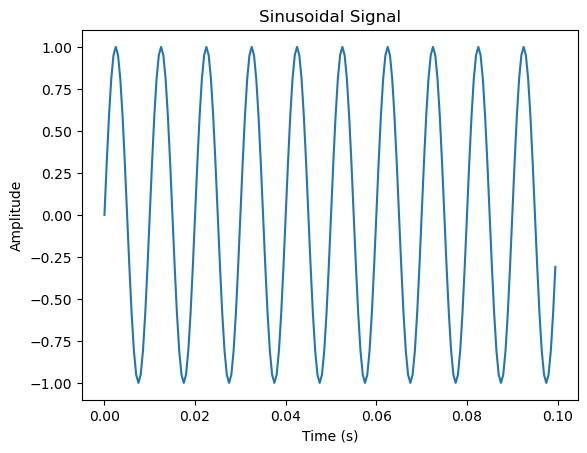

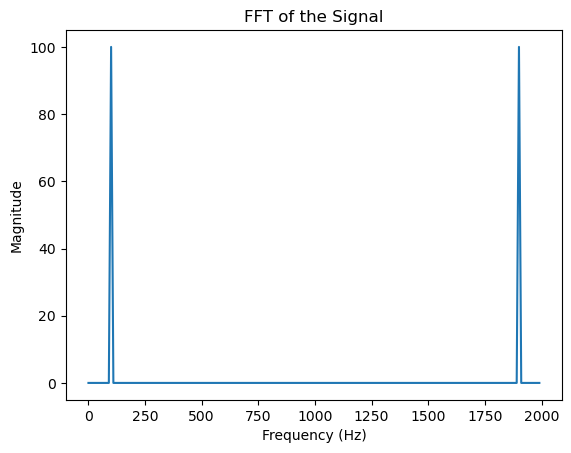

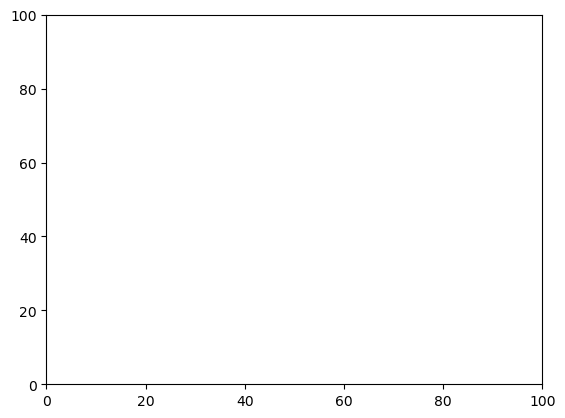

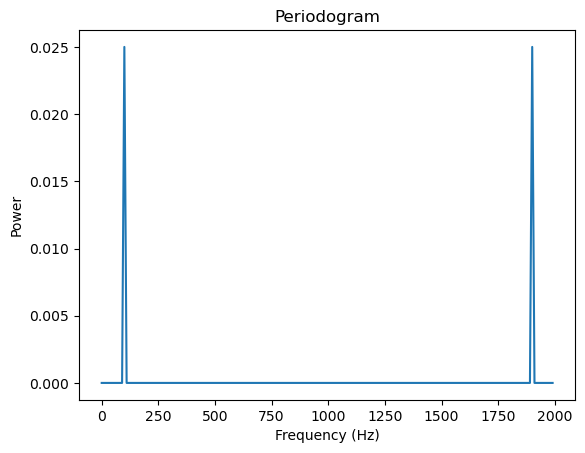

Power (Theory): 0.5
Power (dB): -3.010299956639812
Power (Time Domain): 0.5000000000000001
Power (Frequency Domain): 0.5000000000000001


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# 2.1 Create a Sinusoidal Signal
# ==============================================================================
Fs = 2000                  # Sampling frequency in Hz
Ts = 1 / Fs                # Sampling period in seconds
T = 0.1                    # Signal duration in seconds
t = np.arange(0, T, Ts)    # Time vector for signal
A = 1                      # Signal amplitude
x = A * np.sin(2 * np.pi * 100 * t)  # Generate sinusoidal signal
L = len(x)                 # Length of the signal

# Plot the sinusoidal signal in time domain
plt.figure()
plt.plot(t, x)
plt.title('Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show(block=False)
plt.pause(1)  # Pause to view the plot, press any key in the console to continue

# ==============================================================================
# 2.2 Plot Fourier Transform (FT) of the Signal
# ==============================================================================
N = 1 * L                  # Length of Fourier Transform
Fo = Fs / N                # Frequency resolution
Fx = np.fft.fft(x, N)      # Discrete Fourier Transform (DFT) of the signal
freq = np.arange(0, N) * Fo  # Frequency vector

# Plot the magnitude of the DFT
plt.figure()
plt.plot(freq, np.abs(Fx))
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show(block=False)
plt.axis([0, 100, 0, L/2])
plt.pause(1)

# ==============================================================================
# 2.3 Plot Signal Periodogram
# ==============================================================================
power = ((Fx * np.conj(Fx)) / (Fs * L)).real  # Calculate spectral density

plt.figure()
plt.plot(freq, power)
plt.title('Periodogram')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show(block=False)
plt.pause(1)

# ==============================================================================
# 2.4 Calculate Signal Power
# ==============================================================================
power_theory = A**2 / 2                # Theoretical power based on signal amplitude
dB = 10 * np.log10(power_theory)       # Convert power to decibels (dB)
power_time_domain = np.sum(np.abs(x)**2) / L  # Calculate power in time domain
power_frequency_domain = np.sum(power * Fo).real  # Calculate power in frequency domain

# Display calculated power values
print(f'Power (Theory): {power_theory}')
print(f'Power (dB): {dB}')
print(f'Power (Time Domain): {power_time_domain}')
print(f'Power (Frequency Domain): {power_frequency_domain}')

## Μέρος 3:  Εφαρμογή Α

``````{dropdown} Code


`````{tab} Matlab
````matlab
% ==============================================================================
% Part 1 Create the signal
% ==============================================================================
_________ % close all figure windows
_________ % clear workspace
_________ % clear command window
Fs=4000; % sampling frequency 4000 Hz
Ts=____; % sampling period
L=3000; % signal length (number of samples)
T=L*Ts; % signal duration
t=0:Ts:(L-1)*Ts; % timestamps of signal calculation
x=sin(2*pi*200*t)... % sinusoidal signal of frequency 200 Hz
+ 0.3*sin(2*pi*300*(t-2))... % plus sinusoidal signal of frequency 300 Hz
+ sin(2*pi*400*t); % plus sinusoidal signal of frequency 400 Hz
% Plot signal x in time
figure(1) % open a new figure window
plot(t,x) % plot the signal
title('Time domain plot of x') % plot title
xlabel('t (sec)') % x axis label
ylabel('Amplitude') % y axis label
pause % pause, press any key to continue
axis([0 0.3 -2 2]) % x axis values from 0 to 0.3 sec and
% y axis values from -2 to 2
pause % pause, press any key to continue
% Calculate Fourier Transform
N = 2^nextpow2(L); % FFT length
% nextpow2 calculates next power of 2
% grater or equal to L
Fo=____; % frequency analysis
f=(0:N-1)*Fo; % frequency vector
X=________; % DFT for Ν points
% Plot signal in frequency domain
% As signal is real you can plot the one sided signal(positive frequency values)
figure(2) % open a new figure window
plot(f(1:_____)),abs(X(1:_____))) % plot signal only for positive
%frequency values
title('Frequency domain plot of x') % plot title
xlabel('f (Hz)') % set x axis label
ylabel('Amplitude') % set y axis label
pause % pause, press any key to continue
% in order to plot the 2-sided signal you can use fftshift matlab
% function, type help fftshift for more details
figure(3) % open a new figure window
f=f-Fs/2; % shift frequency vector to the left by –Fs/2
X=fftshift(X); % create 2-sided signal
plot(f,abs(X));title('Two sided spectrum of x'); xlabel('f (Hz)');
ylabel('Amplitude')
pause % pause, press any key to continue
% Calculate power of signal
power=X.*conj(X)/N/L; % Calculate power of signal
figure(4) % open a new figure window
plot(f,power) % plot signal power to frequency
xlabel('Frequency (Hz)') % x axis label
ylabel('Power') % y axis label
title('{\bf Periodogram}') % plot title
pause

````
`````

`````{tab}Python
````python
# ==============================================================================
# Part 1: Create the signal
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt

# Close all figure windows
plt.close('all')

# Clear workspace
# In Python, variables need to be explicitly deleted if needed. Typically, just overwrite or ignore.

# Clear command window
# This is not applicable in Python in the same way as in MATLAB.

Fs = 4000  # Sampling frequency in Hz
Ts = ___  # Sampling period
L = 3000  # Signal length (number of samples)
T = L * Ts  # Signal duration
t = np.arange(0, L) * Ts  # Timestamps of signal calculation

# Signal creation
x = np.sin(2 * np.pi * 200 * t) \
    + 0.3 * np.sin(2 * np.pi * 300 * (t - 2)) \
    + np.sin(2 * np.pi * 400 * t)

# Plot signal x in time
plt.figure(1)
plt.plot(t, x)
plt.title('Time domain plot of x')
plt.xlabel('t (sec)')
plt.ylabel('Amplitude')
plt.show(block=False)  # block=False allows the script to continue while the plot is shown
plt.pause(1)  # Pause for 1 second; adjust as needed

plt.axis([0, 0.3, -2, 2])  # Adjust axes
plt.pause(1)  # Pause for 1 second; adjust as needed

# Calculate Fourier Transform
N = 2 ** np.ceil(np.log2(L)).astype(int)  # FFT length
Fo = ___  # Frequency analysis step
f = np.arange(0, N) * Fo  # Frequency vector
X = ___  # DFT for N points, fill in with the correct function

# Plot signal in frequency domain
plt.figure(2)
plt.plot(f[:N // 2], np.abs(X[:N // 2]))  # Plot signal only for positive frequency values
plt.title('Frequency domain plot of x')
plt.xlabel('f (Hz)')
plt.ylabel('Amplitude')
plt.show(block=False)
plt.pause(1)

# For a two-sided signal plot
plt.figure(3)
f = f - Fs / 2  # Shift frequency vector
X = np.fft.fftshift(X)  # Shift the zero to the center
plt.plot(f, np.abs(X))
plt.title('Two sided spectrum of x')
plt.xlabel('f (Hz)')
plt.ylabel('Amplitude')
plt.show(block=False)
plt.pause(1)

# Calculate power of signal
power = (X * np.conj(X)) / N / L
plt.figure(4)
plt.plot(f, power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Periodogram')
plt.show(block=False)
plt.pause(1)
````
`````


In [67]:
# Callback function to update graphs
def update_graph(selected_frequencies_part1, selected_Fo):
    # Part 1: Create the signal
    Fs = selected_frequencies_part1        # Sampling frequency 1000 Hz
    Ts = 1 / Fs                      # Sampling period
    L = 1000                         # Length of signal (number of samples)
    T = L * Ts                       # Duration of signal
    t = np.arange(0, (L - 1) * Ts, Ts)  # Time vector

    global new_x 
    new_x = np.sin(2 * np.pi * (selected_Fo-30) * t) \
        + 0.8 * np.sin(2 * np.pi * (selected_Fo+20) * (t - 2)) \
        + np.sin(2 * np.pi * selected_Fo * t)  # 60 Hz component
    
    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(12, 20))
    
    # Time domain plot
    axs[0].plot(t, new_x, color='#00CC96')
    axs[0].set_title('Time domain plot of x')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Fourier transform
    def nextpow2(i):
        n = 1
        while n < i:
            n *= 2
        return n

    N = nextpow2(L)                 # Length of Fourier transform
    Fo = Fs / N                     # Frequency resolution
    f = np.arange(0, N) * Fo        # Frequency vector
    X = np.fft.fft(new_x, N)            # Compute DFT for N points

    # Frequency domain plot
    axs[1].plot(f[1:N], abs(X[1:N]), color='#1F77B4')
    axs[1].set_title('Frequency domain plot of x')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)

    # Shift frequencies to center
    f = f - Fs / 2
    X = np.fft.fftshift(X)

    # Two-sided spectrum of x
    f_shifted = f 

    # Two-sided spectrum plot
    axs[2].plot(f_shifted, abs(X), color='#1F77B4')
    axs[2].set_title('Two sided spectrum of x')
    axs[2].set_xlabel('f (Hz)')
    axs[2].set_ylabel('Amplitude')
    axs[2].grid(True)

    # Calculate power
    power = np.multiply(X, np.conj(X)) / N / L

    # Periodogram plot
    axs[3].plot(f_shifted, power.real, color='#1F77B4')
    axs[3].set_title('Periodogram')
    axs[3].set_xlabel('Frequency (Hz)')
    axs[3].set_ylabel('Power')
    axs[3].grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive widgets
frequency_slider = widgets.IntSlider(
    min=100,
    max=2000,
    step=100,
    value=1000,
    description='Sampling Frequency (Fs):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

Fo_slider = widgets.IntSlider(
    min=40,
    max=400,
    step=10,
    value=100,
    description='Frequency (Fo):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Μέρος 3: Part 1</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, frequency_slider, Fo_slider], layout=vbox_layout)
out = widgets.interactive_output(update_graph, {'selected_frequencies_part1': frequency_slider, 'selected_Fo': Fo_slider})

# Display the widgets and output
clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [68]:
# Part 2 Προσθέστε θόρυβο στο σήμα

# Συμπληρώστε τον κώδικα για τη δημιουργία του σήματος θορύβου n με τη βοήθεια της συνάρτησης randn.
# Το διάνυσμα θορύβου n θα πρέπει να είναι του ίδιου μεγέθους με αυτό της ημιτονοειδούς κυματομορφής x του πρώτου μέρους.
# Σχεδιάστε το σήμα θορύβου στο διάστημα από 0 έως 0.2 sec και κλίμακα σε από -2 έως 2.
# Υπολογίστε το περιοδόγραμμα του n και σχεδιάστε την πυκνότητα φάσματος ισχύος του σήματος θορύβου.
# Προσθέστε το σήμα θορύβου και το x για να λάβετε το σήμα με θόρυβο s.
# Σχεδιάσατε το σήμα με θόρυβο s στο πεδίο του χρόνου στην περιοχή 0 έως 0.2 sec 
# και κλίμακα από -2 έως 2 καθώς και το αμφίπλευρο φάσμα του.

Fs=1000                    # συχνότητα δειγματοληψίας 1000 Hz
Ts=1/Fs                    # περίοδος δειγματοληψίας
L=1000                     # μήκος σήματος (αριθμός δειγμάτων)
T=L*Ts                     # διάρκεια σήματος
t=np.arange(0,(L-1)*Ts,Ts) # χρονικές στιγμές υπολογισμού του σήματος

def nextpow2(i):
    # Compute the next highest power of 2
    n = 1
    while n < i: n *= 2
    return n
             

# Function to update plots
def update_plots(selected_frequencies_part2):
    new_x=np.sin(2*np.pi*(selected_frequencies_part2-30)*t) + 0.8*np.sin(2*np.pi*(selected_frequencies_part2+20)*(t-2))+ np.sin(2*np.pi*(selected_frequencies_part2)*t);         
    rand_n = np.random.randn(np.size(new_x))
    
    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(12, 20))

    # Time domain plot of n
    axs[0].plot(t, rand_n, color='#00CC96')
    axs[0].set_title('Time domain plot of n')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Correction for N calculation using bitwise operator
    N = 2^nextpow2(L)
    Fo = Fs / N   
    f = (np.arange(0, N)) * Fo
    f_shifted = f - Fs/2
    rand_N = np.fft.fft(rand_n, N)
    rand_N = np.fft.fftshift(rand_N)
    power_n = np.multiply(rand_N, np.conj(rand_N)) / N / L
    # Frequency domain plot of x
    axs[1].plot(f_shifted, power_n.real, color='#1F77B4')
    axs[1].set_title('Frequency domain plot of x')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)
    
    # Two sided spectrum of x
    s = new_x + rand_n
    axs[2].plot(t, s, color='#00CC96')
    axs[2].set_title('Two sided spectrum of x')
    axs[2].set_xlabel('t (sec)')
    axs[2].set_ylabel('Amplitude')
    axs[2].grid(True)
    
    # Two sided spectrum of s
    S = np.fft.fft(s, N)
    S = np.fft.fftshift(S)
    axs[3].plot(f_shifted, np.abs(S), color='#1F77B4')
    axs[3].set_title('Two sided spectrum of s')
    axs[3].set_xlabel('f (Hz)')
    axs[3].set_ylabel('Magnitude')
    axs[3].grid(True)
    
    plt.tight_layout()
    plt.show()

# Create the slider widget
fs_slider = widgets.IntSlider(
    value=1000,
    min=100,
    max=2000,
    step=100,
    description='Sampling Frequency (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Μέρος 3: Part 2</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, frequency_slider], layout=vbox_layout)
out = widgets.interactive_output(update_plots, {'selected_frequencies_part2': frequency_slider})

# Display the slider
clear_output(wait=True)  # Clear the previous plot
display(ui,out)


Output()

In [69]:
# Part 3. Πολλαπλασιασμός σημάτων

# Συμπληρώστε τον κώδικα δημιουργίας ενός ημιτονοειδούς σήματος συχνότητας
# 100 Hz και πολλαπλασιάστε με το προηγούμενο σήμα s.
# Τα δύο σήματα θα πρέπει να είναι του ίδιου μεγέθους.
# Σχεδιάστε το αποτέλεσμα στο πεδίο του χρόνου στην περιοχή 0 έως 0.2 sec
# και κλίμακα από -2 έως 2 καθώς και στο πεδίο της συχνότητας
# χρησιμοποιώντας τη συνάρτηση fftshift.

def update_plots(selected_frequencies_part3):
    Fο=selected_frequencies_part3
    z=np.sin(2*np.pi*Fο*t)
    new_x = np.sin(2 * np.pi * 30 * t) \
        + 0.8 * np.sin(2 * np.pi * 80 * (t - 2)) \
        + np.sin(2 * np.pi * 60 * t)  # 60 Hz component
    L = 1000  # Length of signal
    rand_n = np.random.normal(0, 1, np.size(new_x))  # Example random noise
    s = new_x + rand_n
    y= np.multiply(z,s)

    # Plotting
    fig, axs = plt.subplots(2, 1, figsize=(12, 20))

    # Time domain plot
    axs[0].plot(t, y, color='#00CC96')
    axs[0].set_title('Time domain plot of y')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Fourier transform
    def nextpow2(i):
        n = 1
        while n < i:
            n *= 2
        return n
            
    N = 2^nextpow2(L)
    Fo = Fs / N   
    f = (np.arange(0, N)) * Fo
    Y = np.fft.fft(y, N)
    f=f-Fs/2   
    Y = np.fft.fftshift(Y)

    axs[1].plot(f, np.abs(Y), color='#1F77B4')
    axs[1].set_title('Frequency domain plot of y')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Create the slider widget for Fo
Fo_slider = widgets.IntSlider(
    value=100,
    min=10,
    max=200,
    step=10,
    description='Fo (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Μέρος 3: Part 3</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, Fo_slider], layout=vbox_layout)
out = widgets.interactive_output(update_plots, {'selected_frequencies_part3': Fo_slider})

# Display the slider
clear_output(wait=True)  # Clear the previous plot
display(ui,out)


Output()

## Μέρος 4:  Εφαρμογή Β

Να γραφεί σε Python συνάρτηση φασματικής ανάλυσης, παρόμοια με την `signal.welch()`: θα δέχεται ως είσοδο διάνυσμα πραγματικού σήματος καθώς και τη συχνότητα δειγματοληψίας, $F_s$, και θα σχεδιάζει τη μονόπλευρη φασματική πυκνότητα του σήματος στην περιοχή $[0-F_s/2)$. Το σήμα θα τεμαχίζεται σε τμήματα μήκους ίσου με τη δύναμη του $2$ την πλησιέστερη στο $1/8$ του συνολικού του μήκους, αλλά όχι μικρότερου από 256. Τα τμήματα θα είναι επικαλυπτόμενα κατά $50\%$. Το τελευταίο τμήμα, εάν υπολείπεται σε μήκος των άλλων, θα αγνοείται. Θα υπολογίζεται με FFT το φάσμα κάθε τμήματος και θα λαμβάνεται η μέση τιμή όλων των τμημάτων. Η συνάρτηση να δοκιμαστεί με το σήμα του παραδείγματος 1.1 και να συγκριθεί το αποτέλεσμα με το αντίστοιχο της `signal.welch()`.

In [70]:
# Fourier transform
def nextpow2(i):
        n = 1
        while n < i:
            n *= 2
        return n

def pwelch(x,Fs):                    
    Ts=1/Fs                    
    L=np.size(x)+1                 
    T=L*Ts                     
    N = 2^nextpow2(L)
    Fo=Fs/N                   
    f=np.arange(0,N)*Fo       
     
    window_size = nextpow2(np.size(x)/8)
    if (window_size<256):
        window_size=256
    windows = np.size(x)//(window_size//2)-1
    indexer = np.arange(window_size)[None, :] + (window_size//2)*np.arange(windows)[:, None]
    windowed_x = x[indexer]

    avg_pwr=0
    for window in windowed_x:
        window = window * np.hanning(np.size(window))
        L=np.size(window)+1                 
        T=L*Ts                     
        N = 2^nextpow2(L)
        Fo=Fs/N                   
        f=np.arange(0,N)*Fo
        window_fft=np.fft.fft(window,N)
        power=np.multiply(window_fft,np.conj(window_fft))/N/L
        avg_pwr=avg_pwr+power
    avg_pwr=avg_pwr/windows

    
    
    return f[np.arange(0,N//2)], avg_pwr[np.arange(0,N//2)]


In [71]:
# Function to update plots based on slider value
def update_plots(Fs):
   
    T = 1 / Fs  # Update sampling period
    t1 = np.arange(0, L) * T  # Update time vector
    
    # Recompute signal x with new sampling frequency
    last_x = np.sin(2 * np.pi * 30 * t1) + 0.8 * np.sin(2 * np.pi * 80 * (t1 - 2)) + np.sin(2 * np.pi * 60 * t1)
    
    # Compute pwelch
    f1, Pxx1 = pwelch(last_x, Fs)
    
    # Compute signal.welch
    f2, Pxx2 = signal.welch(last_x, fs=Fs)
    
    # Plot
    fig, axs = plt.subplots(2, 1, figsize=(18.5, 20))
    
    # Plot custom pwelch
    axs[0].plot(f1, Pxx1)
    axs[0].set(xlabel='Frequency (Hz)', ylabel='Power', title='Periodogram pwelch()')
    axs[0].grid()
    
    # Plot signal.welch
    axs[1].plot(f2, Pxx2)
    axs[1].set(xlabel='Frequency (Hz)', ylabel='Power', title='Periodogram signal.welch()')
    axs[1].grid()
    
    plt.tight_layout()

# Create slider for Fs
Fs_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=2000, 
    step=100,
    description='Sampling Frequency (Fs):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}, 
    continuous_update=False
)


html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Μέρος 4:</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, Fs_slider], layout=vbox_layout)
out = widgets.interactive_output(update_plots, {'Fs': Fs_slider})

# Display the slider
clear_output(wait=True)  # Clear the previous plot
display(ui,out)

Output()

In [ ]:
print("hi")